# sklearn

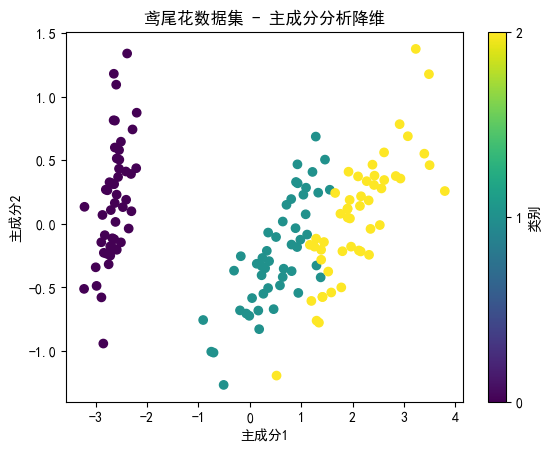

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 创建PCA对象，将数据降维为2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制样本点的分布
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('鸢尾花数据集 - 主成分分析降维(sklearn)')
plt.colorbar(ticks=range(3), label='类别')
plt.show()

# numpy

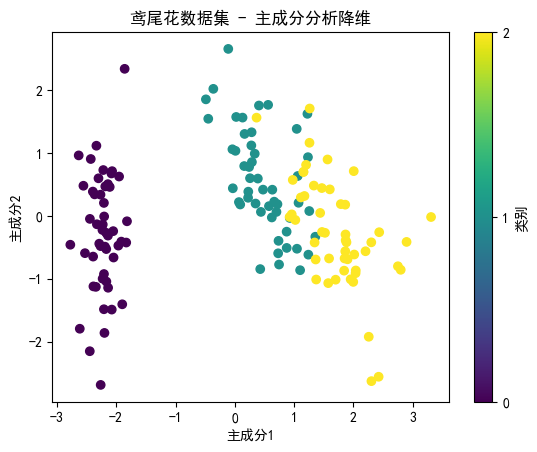

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target


X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # 数据标准化

cov_matrix = np.cov(X_scaled.T) # 计算协方差矩阵

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 选择前两个特征向量对应的特征值最大的成分
top_two_idx = np.argsort(eigenvalues)[::-1][:2]
top_two_eigenvectors = eigenvectors[:, top_two_idx]

# 将数据投影到选定的特征向量上
X_pca = np.dot(X_scaled, top_two_eigenvectors)

# 绘制样本点的分布
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('鸢尾花数据集 - 主成分分析降维(numpy)')
plt.colorbar(ticks=range(3), label='类别')
plt.show()